In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_csv('../data/retail_case_data.csv')

# creating Age column
df['Age'] = datetime.today().year - df['Year_Birth']

In [3]:
# exploring the Age column 
print('min age:', min(df['Age'].unique()))
print('max age:', max(df['Age'].unique()))
print('amplitude of age:', max(df['Age'].unique()) - min(df['Age'].unique()))
print('median age:', df['Age'].median())
print('average age:', df['Age'].mean())

selec_cols = ['Age', 'Response']
new_df = df[selec_cols]

min age: 28
max age: 131
amplitude of age: 103
median age: 54.0
average age: 55.19419642857143


In [4]:
true_frequeny_by_age = new_df.groupby('Age')['Response'].mean()

## Plotting the chart

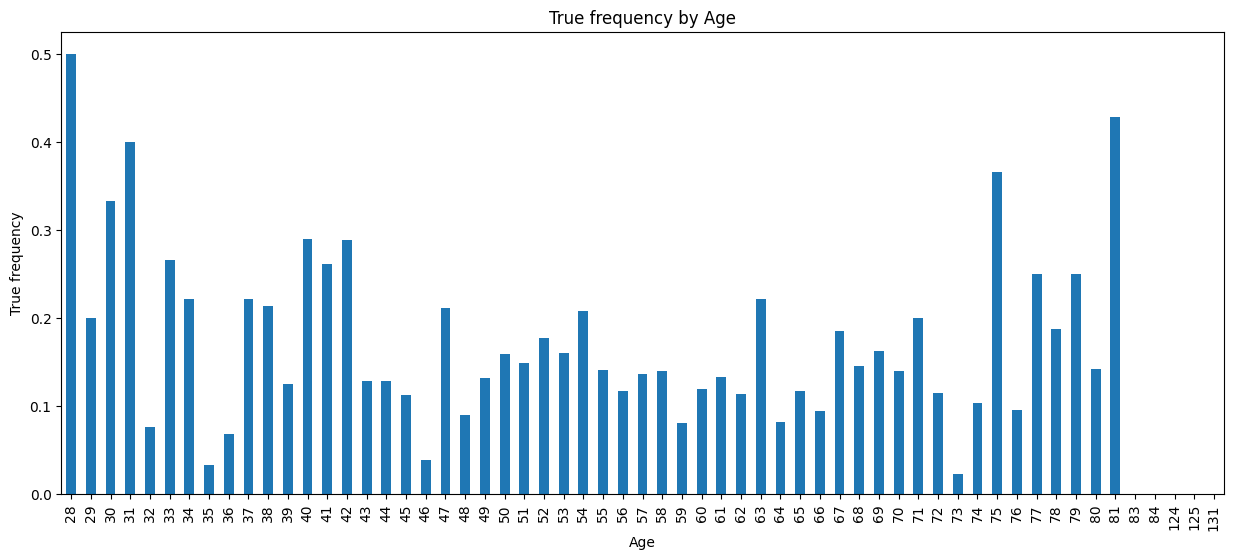

In [5]:
import matplotlib.pyplot as plt

true_frequeny_by_age.plot(kind='bar', figsize=(15,6))
plt.title('True frequency by Age')
plt.xlabel('Age')
plt.ylabel('True frequency')

plt.show()

## Applying T-Test

In [7]:
from scipy.stats import ttest_ind

buyers = new_df[new_df['Response'] == 1]['Age'].dropna()
non_buyers = new_df[new_df['Response'] == 0]['Age'].dropna()

# Realizar o teste t
t_stat, p_valor = ttest_ind(buyers, non_buyers)

print("t statics:", t_stat)
print("p value:", p_valor)
print("p value (string):", '{:.20f}'.format(p_valor))


t statics: -1.0090721535556608
p value: 0.31304911489418885
p value (string): 0.31304911489418885129


## Conclusion

As we can see, with a p-value of 0.31304911489418885 there is no enough evidence to reject the null hypothesis, leading us to believe there is no relationship between age and the response rate.